## Importing Data and Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import chardet

In [2]:
df_fake = pd.read_csv("Fake.csv", encoding='latin-1')
df_real = pd.read_csv('True.csv', on_bad_lines='skip', encoding='latin-1')


In [3]:
df_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


#### summary of dataset

In [5]:
df_fake.describe().T

,count,unique,top,freq
title,23481,17903,MEDIA IGNORES Time That Bill Clinton FIRED His...,6
text,23481,17455,,626
subject,23481,6,News,9050
date,23481,1681,"May 10, 2017",46


In [6]:
df_real.describe()

,title,text,subject,date
count,21416,21416,21416,21416
unique,20825,21191,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11271,182


In [7]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


## Exploring Data Real news

In [9]:
numeric_features_real = [feature for feature in df_real.columns if df_real[feature].dtype != 'O']
categorical_features_real = [feature for feature in df_real.columns if df_real[feature].dtype == 'O']


# print columns
print('We have {} numerical features : {}'.format(len(numeric_features_real), numeric_features_real))
print('\nWe have {} categorical features : {}'.format(len(categorical_features_real), categorical_features_real))

We have 0 numerical features : []

We have 4 categorical features : ['title', 'text', 'subject', 'date']


## Univariate Analysis Real news

In [10]:
df_real['subject'].value_counts()

politicsNews    11271
worldnews       10145
Name: subject, dtype: int64

In [11]:
df_real['title'].value_counts()

Factbox: Trump fills top jobs for his administration                                14
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday     8
Factbox: Contenders for senior jobs in Trump's administration                        8
Factbox: International reaction to arrest of Reuters reporters in Myanmar            6
Highlights: The Trump presidency on April 21 at 6:12 p.m. EDT/2212 GMT               5
                                                                                    ..
Obama, on last trip to Europe, warns against nationalism, populism                   1
A post-Trump SEC could shake up current policy                                       1
U.S. panel urges probe on whether China weakening U.S. militarily                    1
Trump team weighs 'infrastructure bank' to fund projects: Trump adviser              1
Indonesia to buy $1.14 billion worth of Russian jets                                 1
Name: title, Length: 20825, dtype: int64

In [12]:
df_real.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [13]:
df_real.duplicated().sum()

206

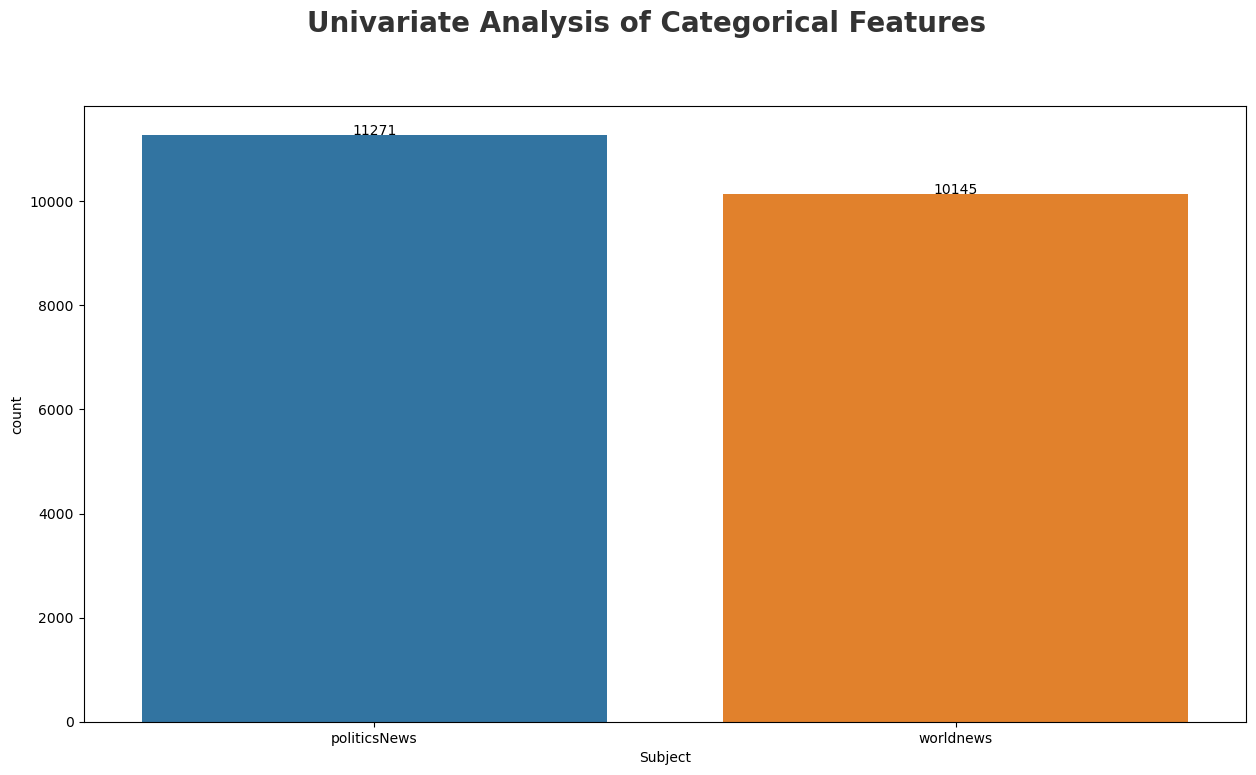

In [14]:
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.countplot(x=df_real['subject'])
x = df_real['subject'].value_counts()

for i,v in enumerate(x):
    plt.text(i,v,str(v), ha = 'center')
plt.xlabel('Subject')
plt.show()

In [15]:
df_real_copy = df_real.copy()
df_real_copy['Status'] = 1
df_real_copy

,title,text,subject,date,Status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21411,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21412,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21413,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21414,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


## EDA for Fake News

In [16]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [17]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [18]:
df_fake.describe().T

,count,unique,top,freq
title,23481,17903,MEDIA IGNORES Time That Bill Clinton FIRED His...,6
text,23481,17455,,626
subject,23481,6,News,9050
date,23481,1681,"May 10, 2017",46


In [19]:
numeric_features_fake = [feature for feature in df_fake.columns if df_fake[feature].dtype != 'O']
categorical_features_fake = [feature for feature in df_fake.columns if df_fake[feature].dtype == 'O']


# print columns
print('We have {} numerical features : {}'.format(len(numeric_features_fake), numeric_features_fake))
print('\nWe have {} categorical features : {}'.format(len(categorical_features_fake), categorical_features_fake))

We have 0 numerical features : []

We have 4 categorical features : ['title', 'text', 'subject', 'date']


In [20]:
for i in categorical_features_fake:
    print(df_fake[i].value_counts())
    print('------------------------------------')

MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead                                                                  6
ELEMENTARY SCHOOL PLANS BLACKS ONLY FIELD TRIP TO COLLEGE FOR THIRD GRADERS                                                                                          4
FORMER FBI ASST DIRECTOR: Jim Comey Danced With The Devil&Im Glad Hes Gone [VIDEO]                                                                               4
AN INSIDE LOOK AT OBAMAS 5-STAR SUMMER VACATION RETREAT: Meanwhile&62% Of Americans Wont Be Taking A Vacation This Summer                                            3
GARY JOHNSON: Meet The Creepy Pro-Amnesty, Anti-Gun, Pro-TPP, Pro-Abortion, Democrat Party Operative And His Anti-Gun Rights, Friend Of Clintons VP Pick [VIDEO]    3
                                                                                                                                                           

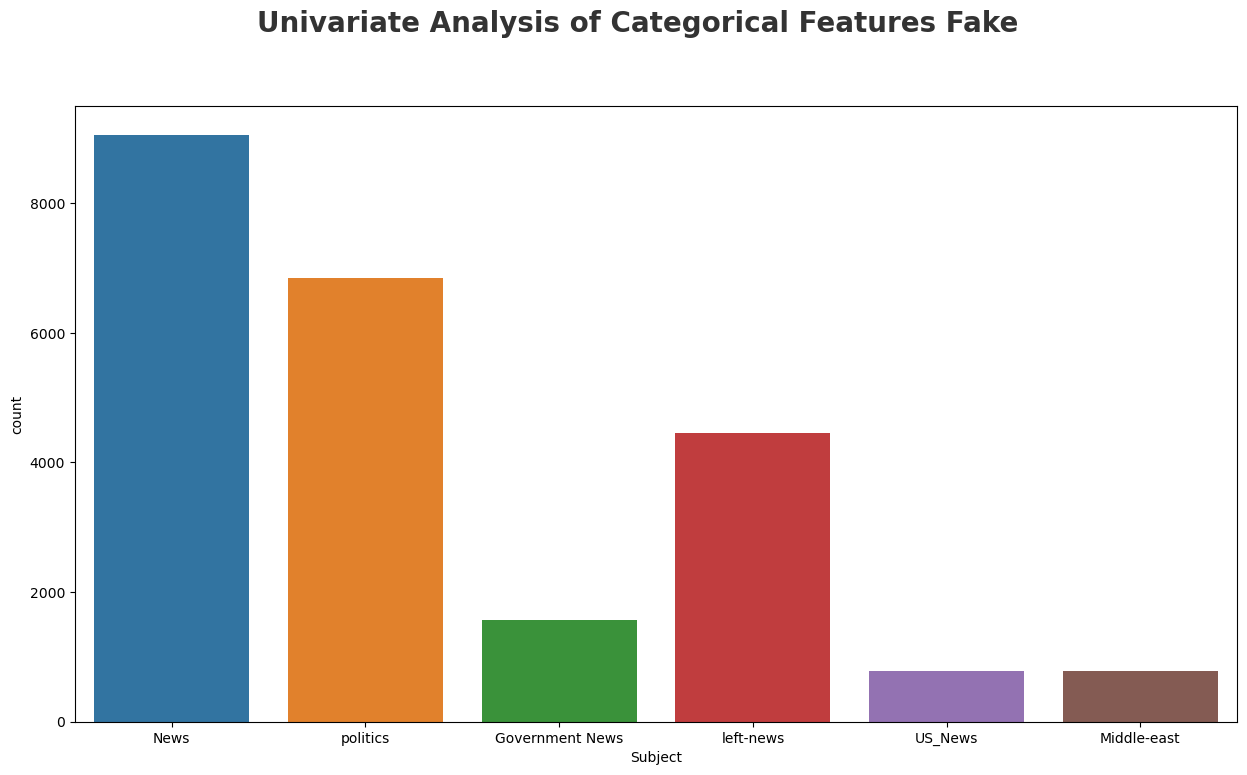

In [21]:
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features Fake', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.countplot(x=df_fake['subject'])
plt.xlabel('Subject')
plt.show()

In [22]:
df_fake_copy = df_fake.copy()
df_fake_copy['Status'] = 0
df_fake_copy

,title,text,subject,date,Status
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


## EDA for Combine Data

In [23]:
combine_df = pd.concat([df_real_copy,df_fake_copy]).reset_index(drop=True)
combine_df

,title,text,subject,date,Status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44892,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44893,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44894,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44895,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [24]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44897 entries, 0 to 44896
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44897 non-null  object
 1   text     44897 non-null  object
 2   subject  44897 non-null  object
 3   date     44897 non-null  object
 4   Status   44897 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [25]:
combine_df.duplicated().sum()

209

In [26]:
numeric_features_combine = [feature for feature in combine_df.columns if combine_df[feature].dtype != 'O']
categorical_features_combine = [feature for feature in combine_df.columns if combine_df[feature].dtype == 'O']


# print columns
print('We have {} numerical features : {}'.format(len(numeric_features_combine), numeric_features_combine))
print('\nWe have {} categorical features : {}'.format(len(categorical_features_combine), categorical_features_combine))

We have 1 numerical features : ['Status']

We have 4 categorical features : ['title', 'text', 'subject', 'date']


#### Status is our Target column

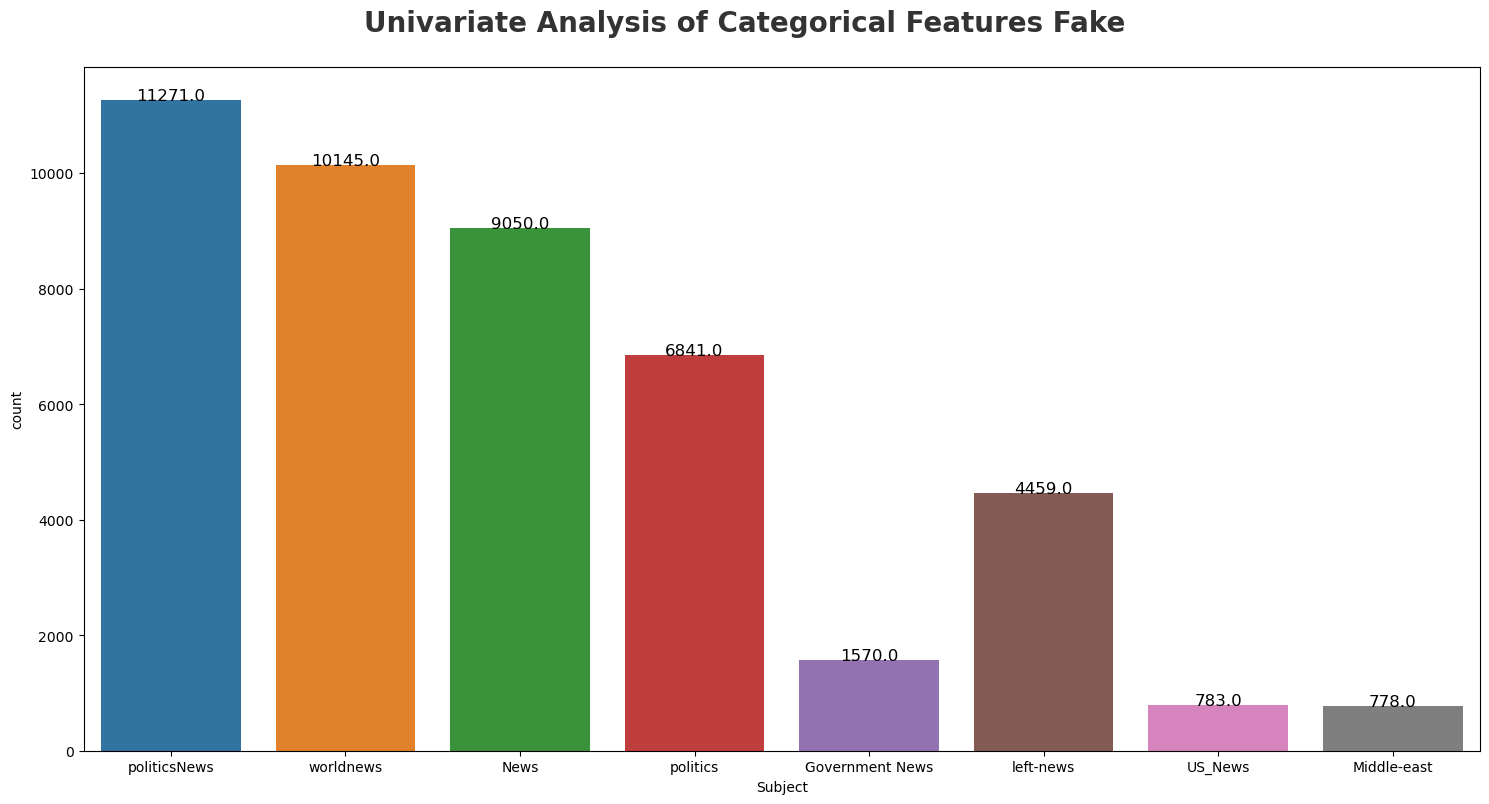

In [27]:
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features Fake', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
graph = sns.countplot(x=combine_df['subject'])
plt.xlabel('Subject')
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)
plt.tight_layout()    
plt.show()

In [28]:
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [29]:
polarity = []

for col in combine_df['text']:
    try:
        polarity.append(TextBlob(col).sentiment.polarity)
    except:
        polarity.append(0)

In [30]:
len(polarity)

44897

In [31]:
combine_df['polarity'] = polarity

##  Wordcloud Analysis of your data

In [32]:
# setting negative and positive words

filter1 = combine_df['polarity']==1
filter2 = combine_df['polarity']==-1

In [33]:
comments_positive = combine_df[filter1]
comments_negative = combine_df[filter2]

In [34]:
### for wordcloud , we need to frame our 'text' feature into string ..
total_comments_positive = ' '.join(comments_positive['text'])

In [35]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

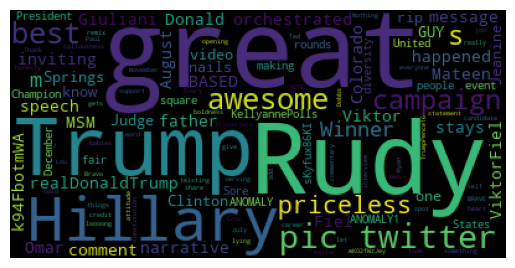

In [36]:
plt.imshow(wordcloud)
plt.axis('off')

In [37]:
total_comments_negative = ' '.join(comments_negative['text'])

In [38]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

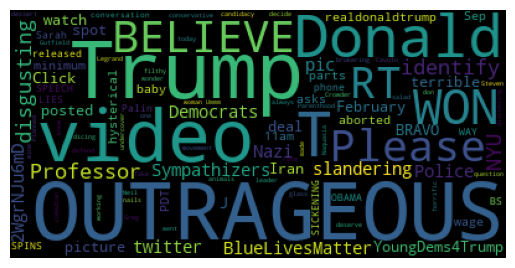

In [39]:
plt.imshow(wordcloud2)
plt.axis('off')

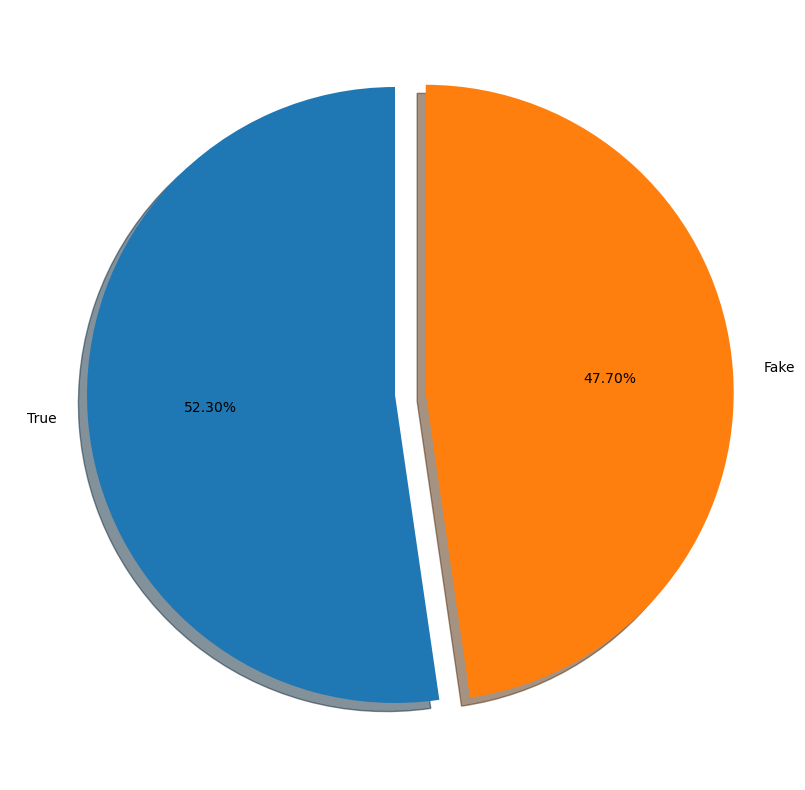

In [40]:
label = ['True', 'Fake']
percentage = combine_df['Status'].value_counts(normalize=True)*100

fig,ax = plt.subplots(figsize = (15,10))
explode = (0,0.1)
ax.pie(percentage,labels= label, startangle=90, explode=explode, shadow=True,autopct='%1.2f%%')
plt.show()

#### As our Data is well distributed we do not need to perform any sampling techniques

-------------------------------------------
------------------------------------------

## Final Report
*  `Date` column is not neccessery, we can drop it.
* `Status` is well distributed, we do not need to perform any sampling techniques.
* We have only `2` columns of subject in Real news and `6` columns of subject in fake news.
* there are `206` duplicated columns which needs to be handeled.